**Importing the Libraries**

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated-sbl-data.csv to updated-sbl-data (1).csv


In [ ]:
df = pd.read_csv("updated-sbl-data.csv")
df

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# df.to_csv(r"sbl-data.csv", index=False)

In [ ]:
# new_header = [" S.N","Date","Open","High","Low","Ltp","% Change","Qty","Turnover"]
# df.columns = new_header

In [ ]:
df.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


In [ ]:
df['Low'].value_counts()

300.00    29
290.00    22
310.00    21
312.00    20
288.00    20
          ..
634.00     1
656.00     1
744.00     1
747.00     1
471.00     1
Name: Low, Length: 603, dtype: int64

In [ ]:
df['High'].value_counts()

300.00      22
345.00      22
325.00      18
305.00      18
290.00      18
            ..
1,043.00     1
1,036.00     1
1,020.00     1
1,018.00     1
272.00       1
Name: High, Length: 645, dtype: int64

In [ ]:
df['Low'].dtypes, df['High'].dtypes

(dtype('O'), dtype('O'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2000 non-null   object
 1   Open      2000 non-null   object
 2   High      2000 non-null   object
 3   Low       2000 non-null   object
 4   Ltp       2000 non-null   object
 5   Turnover  2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB


In [ ]:
# Low = df['Low'].apply(lambda x: float(x))

# try:
#   Low = float(df["Low"])
# except:
#   pass

df["Low"] = df["Low"].str.replace(",","")
Low = df["Low"].apply(lambda x: float(x))

In [ ]:
Low

0       310.0
1       306.0
2       310.0
3       308.0
4       298.2
        ...  
1995    303.0
1996    306.0
1997    309.0
1998    305.0
1999    310.0
Name: Low, Length: 2000, dtype: float64

In [ ]:
df["High"] = df["High"].str.replace(",","")
High = df["High"].apply(lambda x: float(x))

In [ ]:
df['Date'].loc[::50]

0       2022-06-29
50      2022-04-18
100     2022-01-27
150     2021-11-16
200     2021-08-25
250     2021-06-13
300     2021-03-30
350     2021-01-13
400     2020-11-01
450     2020-08-17
500     2020-03-01
550     2019-12-22
600     2019-09-30
650     2019-07-22
700     2019-05-09
750     2019-02-21
800     2018-12-13
850     2018-09-27
900     2018-07-16
950     2018-05-03
1000    2018-02-14
1050    2017-11-23
1100    2017-08-30
1150    2017-06-14
1200    2017-03-26
1250    2017-01-09
1300    2016-10-20
1350    2016-07-31
1400    2015-11-15
1450    2015-08-18
1500    2015-06-08
1550    2015-02-24
1600    2014-12-10
1650    2014-09-16
1700    2014-06-30
1750    2014-04-16
1800    2014-01-23
1850    2013-10-30
1900    2013-08-11
1950    2013-06-02
Name: Date, dtype: object

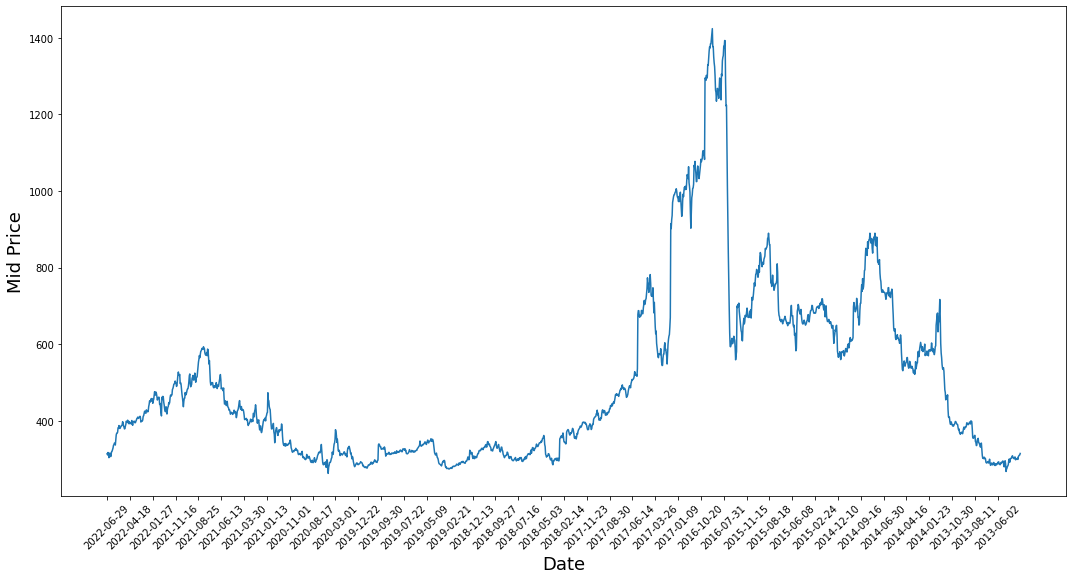

In [ ]:
#Data Visualization
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(Low + High)/2.0)
plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

First calculating the mid-prices 

In [ ]:
mid_prices = (Low+High) / 2.0
# mid_prices

now splitting the data into training and testing sets

In [ ]:
len(df), 2000*0.8

(2000, 1600.0)

In [ ]:
training = mid_prices[:1600]
testing = mid_prices[1600:]

**Normalizing the Data**

Scale the data to be between 0 and 1 <br>
When scaling, normalize both test and train data with respect to training data <br>
Because we are not supposed to have access to test data  <br>


reshape the training and test data to be in the shape [data_size, num_features].


**MinMaxScaler:** <br>
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.


In [ ]:
scaler = MinMaxScaler()
train_data = training.values.reshape(-1,1)
test_data = testing.values.reshape(-1,1)

In [ ]:
train_data

array([[314.45],
       [311.25],
       [317.5 ],
       ...,
       [649.5 ],
       [624.5 ],
       [581.5 ]])

In [ ]:
test_data

array([[574. ],
       [566. ],
       [574. ],
       [570.5],
       [580.5],
       [571.5],
       [560. ],
       [565. ],
       [580.5],
       [580. ],
       [579.5],
       [578.5],
       [583.5],
       [572.5],
       [569.5],
       [575. ],
       [583.5],
       [589. ],
       [583.5],
       [580.5],
       [580. ],
       [594. ],
       [600. ],
       [601. ],
       [590.5],
       [598.5],
       [614. ],
       [617.5],
       [607.5],
       [612.5],
       [610. ],
       [610. ],
       [613. ],
       [617.5],
       [698. ],
       [709. ],
       [700. ],
       [693.5],
       [685. ],
       [687.5],
       [693. ],
       [720. ],
       [705.5],
       [700. ],
       [670. ],
       [670. ],
       [650. ],
       [653.5],
       [687.5],
       [707. ],
       [707. ],
       [737.5],
       [755.5],
       [738. ],
       [771.5],
       [744. ],
       [750. ],
       [765. ],
       [792.5],
       [794. ],
       [828. ],
       [850.5],
       [

In [ ]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 300
for di in range(0,1200,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [ ]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
train_data

array([0.03575747, 0.02470202, 0.0462947 , ..., 0.11938601, 0.09096077,
       0.04206936])

In [ ]:
test_data

array([ 0.03354179,  0.02444571,  0.03354179,  0.02956225,  0.04093235,
        0.03069926,  0.01762365,  0.0233087 ,  0.04093235,  0.04036384,
        0.03979534,  0.03865833,  0.04434338,  0.03183627,  0.02842524,
        0.03467879,  0.04434338,  0.05059693,  0.04434338,  0.04093235,
        0.04036384,  0.05628198,  0.06310404,  0.06424105,  0.05230244,
        0.06139852,  0.07902217,  0.08300171,  0.07163161,  0.07731666,
        0.07447413,  0.07447413,  0.07788516,  0.08300171,  0.17453098,
        0.18703809,  0.176805  ,  0.16941444,  0.15974986,  0.16259238,
        0.16884594,  0.1995452 ,  0.18305856,  0.176805  ,  0.14269471,
        0.14269471,  0.11995452,  0.12393405,  0.16259238,  0.18476407,
        0.18476407,  0.21944287,  0.23990904,  0.22001137,  0.25810119,
        0.22683343,  0.23365549,  0.25071063,  0.2819784 ,  0.28368391,
        0.32234224,  0.34792496,  0.33086981,  0.33086981,  0.32689028,
        0.36725412,  0.34792496,  0.36611711,  0.37350767,  0.37

In [ ]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(1200):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

**One-Step Ahead Prediction via Averaging**

Averaging mechanisms allow you to predict (often one time step ahead) by representing the future stock price as an average of the previously observed stock prices.

In [ ]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.02517


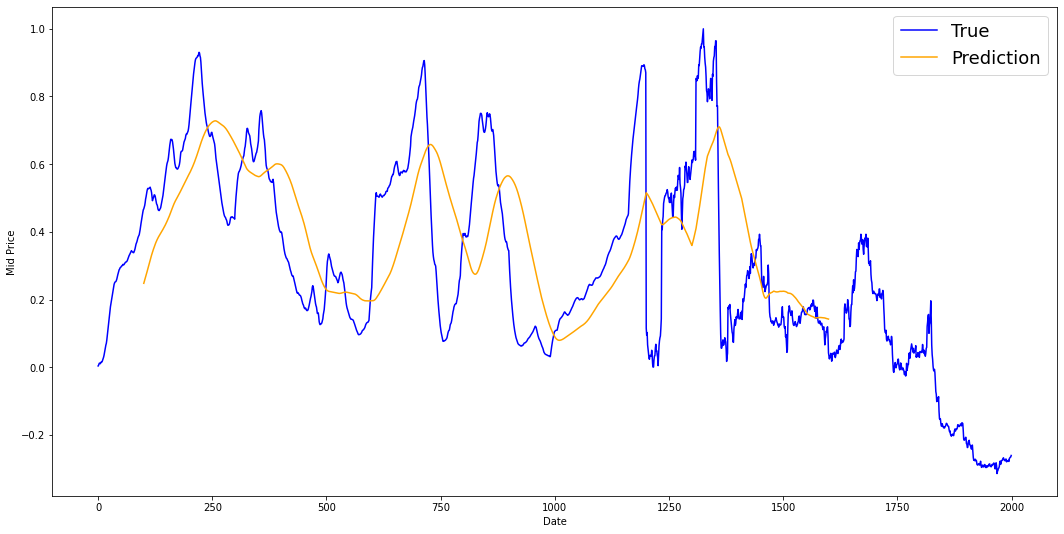

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

**Exponential Moving Average**

In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00059


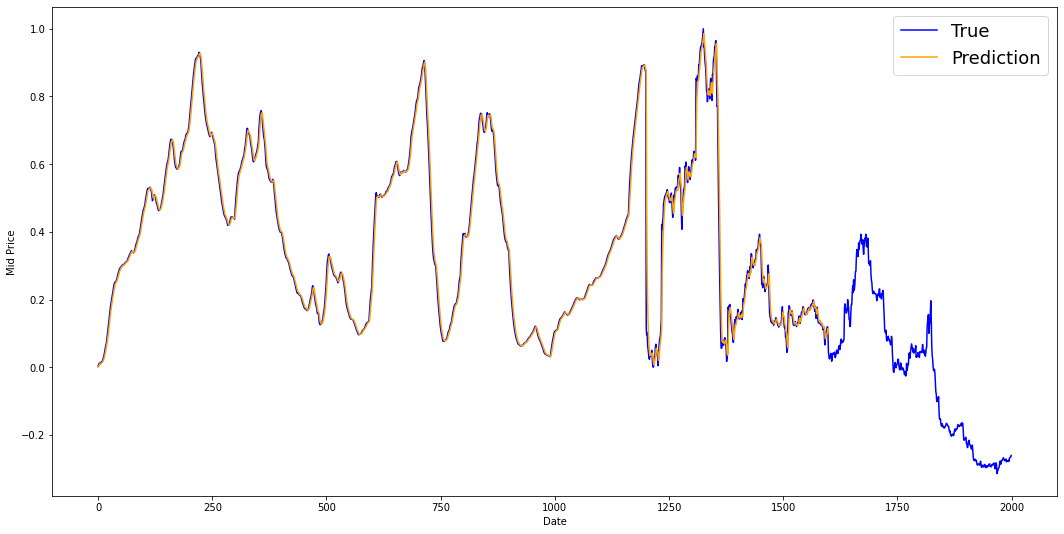

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()